# Path Planning by Optimization for Autonomous Vehicles
OPTIMIZATION THEORY - TERM PROJECT

202060410 Soonkyu Jeong

## Road model - cubic spline
모든 점을 지나는 곡선

$$
S(x)=
\left\{
\begin{matrix}
C_1(x),&x_0\le x\le x_1 \\
C_i(x), & x_{i-1}\le x\le x_i \\
C_n(x), & x_{n-1}\le x\le x_n
\end{matrix}
\right.
$$

where each $$C_i$$ is a cubic function.

$$C_i(x)=a_i+b_ix+c_ix^2+d_ix^3$$

There are $$4n$$ unknown coefficients.

Boundary conditions

모든 점을 지나는 조건 ($$2n$$ 개의 식)

$$C_i(x_{i-1})=y_{i-1}$$

$$C_i(x_i)=y_i$$

$$a_i+b_ix_{i-1}+c_ix_{i-1}^2+d_ix_{i-1}^3=y_{i-1}$$

$$a_i+b_ix_i+c_ix_i^2+d_ix_i^3=y_i$$

모든 중간점에서 1차 미분과 2차 미분이 일치 ($$2(n-1)$$ 개의 식)

$$C'_i(x_i)=C'_{i+1}(x_i)$$

$$C''_i(x_i)=C''_{i+1}(x_i)$$

$$b_i+2c_ix_i+3d_ix_i^2=b_{i+1}+2c_{i+1}x_i+3d_{i+1}x_i^2$$

$$2c_i+6d_ix_i=2c_{i+1}+6d_{i+1}x_i$$

2 개의 식
1. natural boundary conditions

$$C''_1(x_0)=C''_n(x_n)=0$$

2. simple boundary conditions

$$C'_1(x_0)=C'_n(x_n)=0$$


## Path model - quintic polynomial
시작점과 끝점의 위치, 속도, 가속도를 만족하는 최소한의 다항식

### 1D polynomial
$$p(t)=a_0+a_1t+a_2t^2+a_3t^3+a_4t^4+a_5t^5$$

$$v(t)=\dot x(t)=a_1+2a_2t+3a_3t^2+4a_4t^3+5a_5t^4$$

$$a(t)=\ddot x(t)=2a_2+6a_3t+12a_4t^2+20a_5t^3$$

boundary conditions

$$p(0)=a_0$$

$$v(0)=a_1$$

$$a(0)=2a_2$$

$$p(T)=a_0+a_1T+a_2T^2+a_3T^3+a_4T^4+a_5T^5$$

$$v(T)=a_1+2a_2T+3a_3T^2+4a_4T^3+5a_5T^4$$

$$a(T)=2a_2+6a_3T+12a_4T^2+20a_5T^3$$

$$
\begin{bmatrix}
T^3 & T^4 & T^5 \\
3T^2 & 4T^3 & 5T^4 \\
6T & 12T^2 & 20T^3
\end{bmatrix}
\begin{bmatrix}
a_3 \\ a_4 \\ a_5
\end{bmatrix} =
\begin{bmatrix}
p(T)-p(0)-v(0)T-\frac{1}{2}a(0)T^2 \\
v(T)-v(0)-a(0)T \\
a(T)-a(0)
\end{bmatrix} \equiv
\begin{bmatrix}
\Delta x \\ \Delta v \\ \Delta a
\end{bmatrix}
$$

$$
\begin{bmatrix}
a_3 \\ a_4 \\ a_5
\end{bmatrix} =
\begin{bmatrix}
\frac{10}{T^3} & -\frac{4}{T^2} & \frac{1}{2T} \\
-\frac{15}{T^4} & \frac{7}{T^3} & -\frac{1}{T^2} \\
\frac{6}{T^5} & -\frac{3}{T^4} & \frac{1}{2T^3}
\end{bmatrix}
\begin{bmatrix}
\Delta x \\ \Delta v \\ \Delta a
\end{bmatrix} =
\begin{bmatrix}
(10\Delta x-4T\Delta v+\frac{1}{2}T^2\Delta a)/T^3 \\
(-15\Delta x+7T\Delta v - T^2\Delta a)/T^4 \\
(6\Delta x-3T\Delta v+\frac{1}{2}T^2\Delta a)/T^5
\end{bmatrix}$$

### 2D polynomial

$$ p(t)=\begin{bmatrix}x(t)\\y(t)\end{bmatrix}$$

$$ v(t)=\dot { p}(t)$$

$$ a(t)=\dot { v}(t)$$

$$ j(t)=\dot { a}(t)=\begin{bmatrix}
6a_{x3}+24a_{x4}T+60a_{x5}T^2 \\
6a_{y3}+24a_{y4}T+60a_{y5}T^2
\end{bmatrix}$$




# 경로 계획 (path planning by optimization)
## design variables
$$ x=\begin{bmatrix}T & d_T & v_T\end{bmatrix}^T$$

## objective function
$$\begin{align*}f( x) &= k_j\int_0^T| j(t)|^2dt + k_tT + k_dd_e^2 + k_v(v_e-v_{ref})^2 \\
&\equiv k_jJ_1+k_tJ_2+k_dJ_3+k_vJ_4
\end{align*}$$

$$
\begin{align*}
| j(t)|^2 &= (6a_{x3}+24a_{x4}t+60a_{x5}t^2)^2 + (6a_{y3}+24a_{y4}t+60a_{y5}t^2)^2 \\
&= 3600(a_{x5}^2+a_{y5}^2)t^4 + 2880(a_{x4}a_{x5}+a_{y4}a_{y5})t^3 \\
&+ [576(a_{x4}^2+a_{y4}^2) + 720(a_{x3}a_{x5}+a_{y3}a_{y5})]t^2 \\
&+288(a_{x3}a_{x4}+a_{y3}a_{y4})t + 36(a_{x3}^2+a_{y3}^2)
\end{align*}
$$

$$
\begin{align*}
J_1=\int_0^T| j(t)|^2dt &= 720(a_{x5}^2+a_{y5}^2)T^5 + 720(a_{x4}a_{x5}+a_{y4}a_{y5})T^4 \\
&+ [192(a_{x4}^2+a_{y4}^2) + 240(a_{x3}a_{x5}+a_{y3}a_{y5})]T^3 \\
&+144(a_{x3}a_{x4}+a_{y3}a_{y4})T^2 + 36(a_{x3}^2+a_{y3}^2)T
\end{align*}
$$



## constraint function
$$ g( x)=\begin{bmatrix}
d(t)-d_{max}\le0\\
| v(t)|^2-v_{max}^2\le0\\
| a(t)|^2-a_{max}^2\le0\\
\kappa(t)^2-\kappa_{max}^2\le0
\end{bmatrix}, \forall t\in[0,T]$$

where $d(t)$ is the vehicle's closest distance to the road center line


$$ g( x)=\begin{bmatrix}
\max\limits_{t\in[0,T]}d(t)-d_{max}\le0\\
\max\limits_{t\in[0,T]}| v(t)|^2-v_{max}^2\le0\\
\max\limits_{t\in[0,T]}| a(t)|^2-a_{max}^2\le0\\
\max\limits_{t\in[0,T]}\kappa(t)^2-\kappa_{max}^2\le0
\end{bmatrix}$$

$d(t)$를 계산하기 위해서는 cubic spline과의 closest distance를 구할 수 있어야 하는데 아직 analytic한 방법이 알려져 있지 않아 numerical method를 사용함



## Lagrangian algorithm (Chong 560p)
min $$f( x)$$

s.t. $$ g( x)\le 0$$

where $$ g: \mathbb{R}^n\rightarrow\mathbb{R}^m$$

$$ x_{k+1}= x_k-\alpha_k [\nabla f( x_k)+D g( x_k)^Tsymbol\mu_k]$$

$$symbol\mu_{k+1}=[symbol\mu_k+\beta_k g( x_k)]_+$$

where $$\nabla f( x)$$ is the gradient vector of $$f( x)$$

$$D g( x)$$ is the Jacobian matrix of $$ g( x)$$

$$symbol\mu$$ is the Lagrange multiplier

$$[\cdot]_+=\max(\cdot,0)$$ (applied componentwise)

$$[\cdot]_+$$는 KKT 조건을 만족하기 위하여 projection하는 알고리즘

첫 번째 식은 Lagrangian을 최소화하기 위해 $$ x_k$$를 업데이트 하는 식

두 번째 식은 Lagrangian을 최대화하기 위해 Lagrange multiplier $$symbol\mu_k$$를 업데이트하는 식



## Sequential Optimization
Initialize $ p(0),  v(0),  a(0)$.

$k\leftarrow 0$

$ x_k\leftarrow x_0$ (설계변수 초기화)

while $k<N$ (시뮬레이션 길이 설정)

<font style=opacity:0>while</font>$ x_{k+1}\leftarrow$LagrangianAlgorithm($ x_k,\nabla f,D g,\alpha,\beta$) 

<font style=opacity:0>while</font>(Lagrangian 알고리즘으로 최적설계변수 탐색)

<font style=opacity:0>while</font>$ x_k\leftarrow x_{k+1}$ (계산된 최적 설계변수를 다음 스텝의 초기 설계변수로 설정)

<font style=opacity:0>while</font>$ p(0)\leftarrow p(\Delta t), v(0)\leftarrow v(\Delta t), a(0)\leftarrow a(\Delta t)$

<font style=opacity:0>while</font>($\Delta t$ 경과 후 차량의 위치, 속도, 가속도를 현재 차량상태로 설정)

<font style=opacity:0>while</font>$s_0\leftarrow$ConvertXY2NT($ p(0)$) (좌표변환)

<font style=opacity:0>while</font>$s_T\leftarrow s_0+\Delta s$ (차량 주행범위 업데이트)

<font style=opacity:0>while</font>$k\leftarrow k+1$

<font style=opacity:0>while</font>


## 파라미터
도로폭 6 m

$$\Delta t=0.8[sec]$$

$$\Delta s=30[m]$$

$$\alpha=1e-4$$

$$\beta=1e-3$$

max. no. of iteration = 50

$$v_{ref}=10[m/s]=36[kph]$$

$$k_j=1$$

$$k_t=0.004$$

$$k_d=20$$

$$k_v=0.004$$

$$d_{max}=2[m]$$

$$v_{max}=15[m/s]$$

$$a_{max}=9.81[m/s^2]$$

$$\kappa_{max}=3[1/m]$$

최초 설계변수 $$T=3, d_T=0, v_T=10$$


# 시뮬레이션 (vehicle model, path tracking control)
## Car model - error dynamics
### Vehicle model linearization
Vehicle model is 

$$ \dot{x} = v\cos(\phi)$$

$$ \dot{y} = v\sin((\phi)$$

$$ \dot{v} = a$$

$$ \dot{\phi} = \frac{v\tan(\delta)}{L}$$

ODE is

$$ \dot{z} =\frac{\partial }{\partial z} z = f(z, u) = A'z+B'u$$

where

$$\begin{equation*}
A' =
\begin{bmatrix}
\frac{\partial }{\partial x}v\cos(\phi) & 
\frac{\partial }{\partial y}v\cos(\phi) & 
\frac{\partial }{\partial v}v\cos(\phi) &
\frac{\partial }{\partial \phi}v\cos(\phi)\\
\frac{\partial }{\partial x}v\sin(\phi) & 
\frac{\partial }{\partial y}v\sin(\phi) & 
\frac{\partial }{\partial v}v\sin(\phi) &
\frac{\partial }{\partial \phi}v\sin(\phi)\\
\frac{\partial }{\partial x}a& 
\frac{\partial }{\partial y}a& 
\frac{\partial }{\partial v}a&
\frac{\partial }{\partial \phi}a\\
\frac{\partial }{\partial x}\frac{v\tan(\delta)}{L}& 
\frac{\partial }{\partial y}\frac{v\tan(\delta)}{L}& 
\frac{\partial }{\partial v}\frac{v\tan(\delta)}{L}&
\frac{\partial }{\partial \phi}\frac{v\tan(\delta)}{L}\\
\end{bmatrix}
\\
　=
\begin{bmatrix}
0 & 0 & \cos(\bar{\phi}) & -\bar{v}\sin(\bar{\phi})\\
0 & 0 & \sin(\bar{\phi}) & \bar{v}\cos(\bar{\phi}) \\
0 & 0 & 0 & 0 \\
0 & 0 &\frac{\tan(\bar{\delta})}{L} & 0 \\
\end{bmatrix}
\end{equation*}$$

$$\begin{equation*}
B' =
\begin{bmatrix}
\frac{\partial }{\partial a}v\cos(\phi) &
\frac{\partial }{\partial \delta}v\cos(\phi)\\
\frac{\partial }{\partial a}v\sin(\phi) &
\frac{\partial }{\partial \delta}v\sin(\phi)\\
\frac{\partial }{\partial a}a &
\frac{\partial }{\partial \delta}a\\
\frac{\partial }{\partial a}\frac{v\tan(\delta)}{L} &
\frac{\partial }{\partial \delta}\frac{v\tan(\delta)}{L}\\
\end{bmatrix}
\\
　=
\begin{bmatrix}
0 & 0 \\
0 & 0 \\
1 & 0 \\
0 & \frac{\bar{v}}{L\cos^2(\bar{\delta})} \\
\end{bmatrix}
\end{equation*}$$

You can get a discrete-time mode with Forward Euler Discretization with sampling time dt.

$$z_{k+1}=z_k+f(z_k,u_k)dt$$

Using first degree Tayer expantion around zbar and ubar

$$z_{k+1}=z_k+(f(\bar{z},\bar{u})+A'z_k+B'u_k-A'\bar{z}-B'\bar{u})dt$$

$$z_{k+1}=(I + dtA')z_k+(dtB')u_k + (f(\bar{z},\bar{u})-A'\bar{z}-B'\bar{u})dt$$

So, 

$$z_{k+1}=Az_k+Bu_k +C$$

where,

$$\begin{equation*}
A = (I + dtA')\\
=
\begin{bmatrix} 
1 & 0 & \cos(\bar{\phi})dt & -\bar{v}\sin(\bar{\phi})dt\\
0 & 1 & \sin(\bar{\phi})dt & \bar{v}\cos(\bar{\phi})dt \\
0 & 0 & 1 & 0 \\
0 & 0 &\frac{\tan(\bar{\delta})}{L}dt & 1 \\
\end{bmatrix}
\end{equation*}$$

$$\begin{equation*}
B = dtB'\\
=
\begin{bmatrix} 
0 & 0 \\
0 & 0 \\
dt & 0 \\
0 & \frac{\bar{v}}{L\cos^2(\bar{\delta})}dt \\
\end{bmatrix}
\end{equation*}$$

$$\begin{equation*}
C = (f(\bar{z},\bar{u})-A'\bar{z}-B'\bar{u})dt\\
= dt(
\begin{bmatrix} 
\bar{v}\cos(\bar{\phi})\\
\bar{v}\sin(\bar{\phi}) \\
\bar{a}\\
\frac{\bar{v}\tan(\bar{\delta})}{L}\\
\end{bmatrix}
-
\begin{bmatrix} 
\bar{v}\cos(\bar{\phi})-\bar{v}\sin(\bar{\phi})\bar{\phi}\\
\bar{v}\sin(\bar{\phi})+\bar{v}\cos(\bar{\phi})\bar{\phi}\\
0\\
\frac{\bar{v}\tan(\bar{\delta})}{L}\\
\end{bmatrix}
-
\begin{bmatrix} 
0\\
0 \\
\bar{a}\\
\frac{\bar{v}\bar{\delta}}{L\cos^2(\bar{\delta})}\\
\end{bmatrix}
)\\
=
\begin{bmatrix} 
\bar{v}\sin(\bar{\phi})\bar{\phi}dt\\
-\bar{v}\cos(\bar{\phi})\bar{\phi}dt\\
0\\
-\frac{\bar{v}\bar{\delta}}{L\cos^2(\bar{\delta})}dt\\
\end{bmatrix}
\end{equation*}$$






In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from quintic_polynomials import QuinticPolynomial2D
from road import Road
from vector import *
import time
import os
from vehicle_dynamics import do_simulation, State
from path_planner import gradient_mpc


Lagrangian: idx=1, x_opt=[5.48 1.71 6.78], fval_opt=[84.57], g=[-1.4000e-01 -1.7906e+02 -8.8270e+01 -8.9800e+00], num_iter=50, time= 0.25 sec


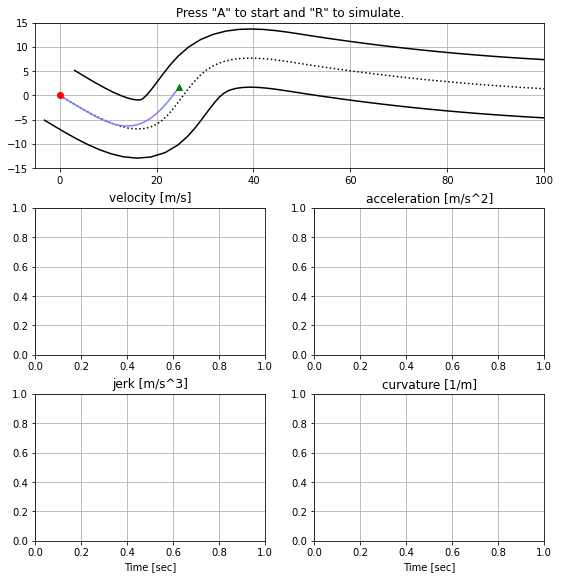

Lagrangian: idx=2, x_opt=[ 4.72 -0.92  9.33], fval_opt=[113.32], g=[  -0.86 -137.9   -84.43   -8.99], num_iter=50, time= 0.28 sec
Lagrangian: idx=3, x_opt=[ 4.18 -5.67 10.48], fval_opt=[1247.8], g=[   3.67 -115.26  -86.96   -8.99], num_iter=50, time= 0.27 sec
Lagrangian: idx=4, x_opt=[ 3.97 -8.33  9.42], fval_opt=[1807.41], g=[   6.33 -136.31  -91.3    -8.99], num_iter=50, time= 0.27 sec
Lagrangian: idx=5, x_opt=[ 3.79 -7.91  8.6 ], fval_opt=[1368.6], g=[   5.91 -150.99  -89.24   -8.99], num_iter=50, time= 0.27 sec
Lagrangian: idx=6, x_opt=[ 3.81 -5.72  8.49], fval_opt=[990.65], g=[   3.72 -152.89  -86.06   -9.  ], num_iter=50, time= 0.29 sec
Lagrangian: idx=7, x_opt=[ 3.77 -2.66 10.06], fval_opt=[177.4], g=[   1.46 -123.71  -82.32   -9.  ], num_iter=50, time= 0.27 sec
Lagrangian: idx=8, x_opt=[4.19 0.2  9.47], fval_opt=[1703.22], g=[   1.03 -135.4   -87.28   -9.  ], num_iter=50, time= 0.29 sec
Lagrangian: idx=9, x_opt=[ 4.29  2.01 10.15], fval_opt=[171.48], g=[   1.05 -122.08  -89.13 

In [8]:
fig = plt.figure(1, figsize=(8,8))
spec = gridspec.GridSpec(ncols=2, nrows=3, width_ratios=[1,1], height_ratios=[2,1,1], wspace=0.2, hspace=0.2)
axes = []
axes.append(plt.subplot2grid((3,2),(0,0),colspan=2))
axes.append(plt.subplot2grid((3,2),(1,0)))
axes.append(plt.subplot2grid((3,2),(1,1)))
axes.append(plt.subplot2grid((3,2),(2,0)))
axes.append(plt.subplot2grid((3,2),(2,1)))
plt.tight_layout(pad=1.8)
axes[0].set_aspect(1)
axes[0].set_xlim(-5, 100)
axes[0].set_ylim(-15, 15)
axes[0].set_title('Press "A" to start and "R" to simulate.')
axes[1].set_title('velocity [m/s]')
axes[2].set_title('acceleration [m/s^2]')
axes[3].set_title('jerk [m/s^3]')
axes[4].set_title('curvature [1/m]')
axes[3].set_xlabel('Time [sec]')
axes[4].set_xlabel('Time [sec]')
for ax in axes:
    ax.grid(True)

gradient_mpc(axes)

![optimal_path](optimal_path.png)

## Discussion

곡선구간에서 부드럽고 빠르게 지나가기 위하여 slow-in-fast-out 기법을 사용함

도로를 벗어나지 않고 속도/가속도/곡률 범위를 지키며 제한조건을 만족함

마직막 시점($T$)에 가속도를 0에 맞추기 위하여 가속도가 급격히 떨어지며 저크가 상승함. 하지만 MPC 방식으로 한 단계 앞의 결과만 취하기 때문에 전반적으로 저크는 낮게 유지됨

목표 속도가 10 m/s (36 kph)이지만 한 단계 앞의 결과만 취하기 때문에 곡선구간을 빠져 나가더라도 빨리 상승하지 않음. 마지막 가속도를 0으로 맞추기 위함인 듯

Gradient method는 병렬화가 어려우며, PSO는 병렬화가 가능하여 빠른 계산이 가능할 듯
